In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [4]:
#renaming the different dataframes from different csv files from 3 month data
dfDailyAM = pd.read_csv("DailyAM.csv")
dfDailyEnd = pd.read_csv("DailyEND.csv")
dfDailyPM = pd.read_csv("DailyPM.csv")
dffridayam = pd.read_csv('FridayAM.csv')


In [5]:
#converting the data type from object to datetime
dfDailyEnd['local_time'] = pd.to_datetime(dfDailyEnd['local_time'])
dffridayam['local_time'] = pd.to_datetime(dffridayam['local_time'])

In [6]:
months = [1,2,3,4,5, 6, 7,8,9,10,11,12]  # Extracting the data for the months of May, June, and July
df_month = dfDailyEnd[dfDailyEnd['local_time'].dt.month.isin(months)]
dff_month = dffridayam[dffridayam['local_time'].dt.month.isin(months)]


In [7]:
#Finding the average number of breaks taken by each rsp_id
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()
df_avgbreaks.head(20)

# df_florence1 = df_month.groupby('rsp_id')['fl']

,rsp_id,DAILY_BREAKS
0,32676,5.333333
1,32678,3.411765
2,32679,3.146341
3,32680,4.323529
4,32681,2.972222
5,32682,7.000000
6,32683,2.432432
7,32684,3.363636
8,32685,3.978723
9,32686,3.812500


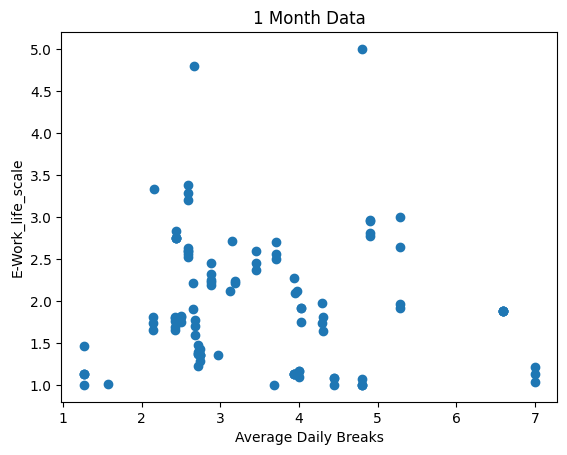

Mean E-Work_life_scale of Breaks (1 Month) = 1.954222222222222


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=1)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for different categories
trust_cols = [f'TRUST_{i}' for i in range(1, 6)]
dffridaypm['Trust'] = dffridaypm[trust_cols].mean(axis=1)

flex_cols = [f'FLEXIBILITY_{i}' for i in range(6, 10)]
dffridaypm['Flexibility'] = dffridaypm[flex_cols].mean(axis=1)

worklife_cols = [f'WORK_LIFE_{i}' for i in range(10, 16)]
dffridaypm['Work_life'] = dffridaypm[worklife_cols].mean(axis=1)

prod_cols = [f'PRODUCTIVITY_{i}' for i in range(16, 22)]
dffridaypm['Productivity'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['E-Work_life_scale'] = (dffridaypm['Trust'] * 0.4) + (dffridaypm['Flexibility'] * 0.3) + \
                                 (dffridaypm['Work_life'] * 0.2) + (dffridaypm['Productivity'] * 0.1)

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['E-Work_life_scale'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("E-Work_life_scale")
plt.title("1 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean E-Work_life_scale of Breaks (1 Month) = " + str(eworkMerged['E-Work_life_scale'].mean()))


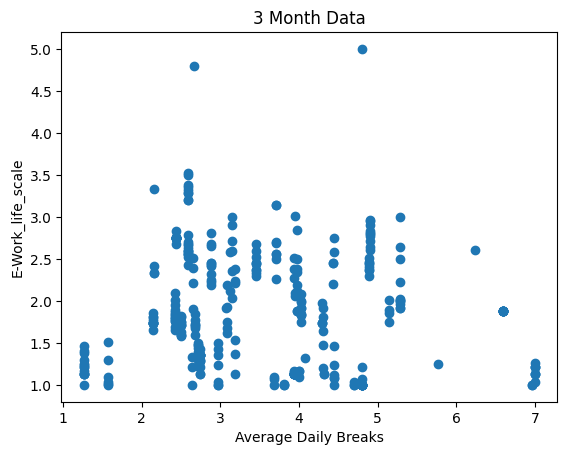

Mean E-Work_life_scale of Breaks (3 Month) = 1.90661094224924


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 3 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=3)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for different categories
trust_cols = [f'TRUST_{i}' for i in range(1, 6)]
dffridaypm['Trust'] = dffridaypm[trust_cols].mean(axis=1)

flex_cols = [f'FLEXIBILITY_{i}' for i in range(6, 10)]
dffridaypm['Flexibility'] = dffridaypm[flex_cols].mean(axis=1)

worklife_cols = [f'WORK_LIFE_{i}' for i in range(10, 16)]
dffridaypm['Work_life'] = dffridaypm[worklife_cols].mean(axis=1)

prod_cols = [f'PRODUCTIVITY_{i}' for i in range(16, 22)]
dffridaypm['Productivity'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['E-Work_life_scale'] = (dffridaypm['Trust'] * 0.4) + (dffridaypm['Flexibility'] * 0.3) + \
                                 (dffridaypm['Work_life'] * 0.2) + (dffridaypm['Productivity'] * 0.1)

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['E-Work_life_scale'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("E-Work_life_scale")
plt.title("3 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean E-Work_life_scale of Breaks (3 Month) = " + str(eworkMerged['E-Work_life_scale'].mean()))


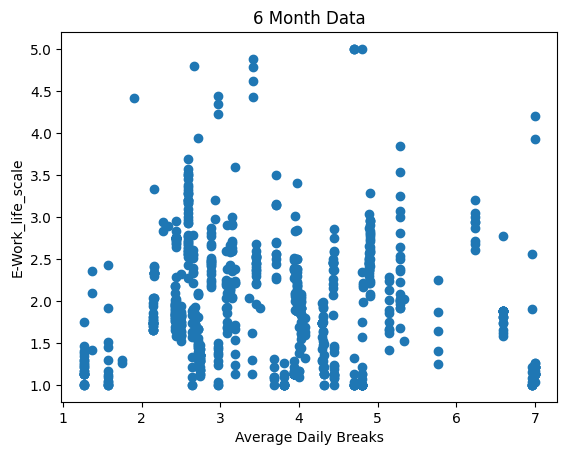

Mean E-Work_life_scale of Breaks (6 Month) = 1.986401617250674


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=6)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for different categories
trust_cols = [f'TRUST_{i}' for i in range(1, 6)]
dffridaypm['Trust'] = dffridaypm[trust_cols].mean(axis=1)

flex_cols = [f'FLEXIBILITY_{i}' for i in range(6, 10)]
dffridaypm['Flexibility'] = dffridaypm[flex_cols].mean(axis=1)

worklife_cols = [f'WORK_LIFE_{i}' for i in range(10, 16)]
dffridaypm['Work_life'] = dffridaypm[worklife_cols].mean(axis=1)

prod_cols = [f'PRODUCTIVITY_{i}' for i in range(16, 22)]
dffridaypm['Productivity'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['E-Work_life_scale'] = (dffridaypm['Trust'] * 0.4) + (dffridaypm['Flexibility'] * 0.3) + \
                                 (dffridaypm['Work_life'] * 0.2) + (dffridaypm['Productivity'] * 0.1)

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['E-Work_life_scale'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("E-Work_life_scale")
plt.title("6 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean E-Work_life_scale of Breaks (6 Month) = " + str(eworkMerged['E-Work_life_scale'].mean()))


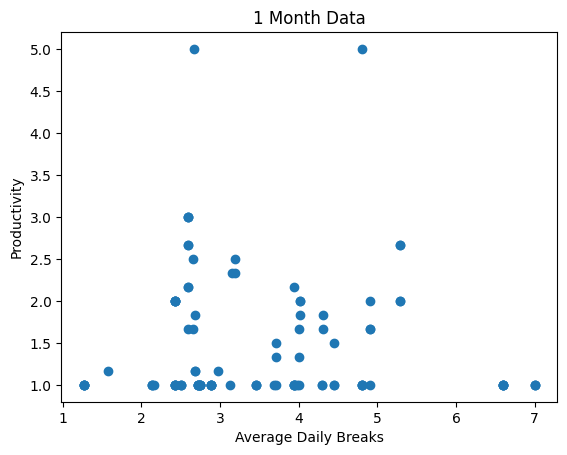

Mean Productivity of Breaks (1 Month) = 1.4634920634920634


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=1)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for productivity
prod_cols = [f'PRODUCTIVITY_{i}' for i in range(16, 22)]
dffridaypm['Productivity'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['Productivity'] = ((dffridaypm['Productivity'] * 1))

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['Productivity'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("Productivity")
plt.title("1 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean Productivity of Breaks (1 Month) = " + str(eworkMerged['Productivity'].mean()))


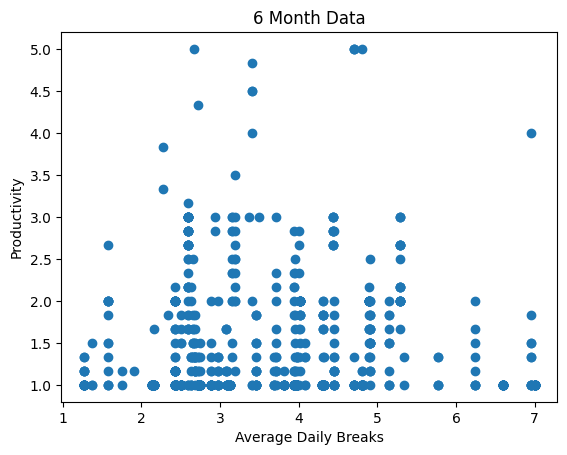

Mean Productivity of Breaks (6 Month) = 1.484950584007188


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=6)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for productivity
prod_cols = [f'PRODUCTIVITY_{i}' for i in range(16, 22)]
dffridaypm['Productivity'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['Productivity'] = ((dffridaypm['Productivity'] * 1))

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['Productivity'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("Productivity")
plt.title("6 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean Productivity of Breaks (6 Month) = " + str(eworkMerged['Productivity'].mean()))


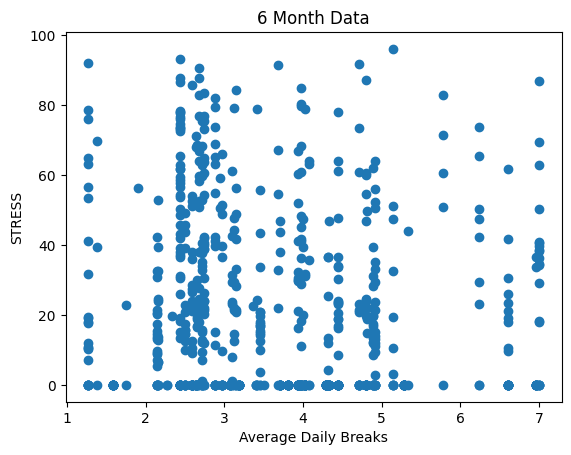

Mean STRESS of Breaks (6 Month) = 20.92579514824798


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=6)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for productivity
prod_cols = [f'STRESS']
dffridaypm['STRESS'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['STRESS'] = ((dffridaypm['STRESS'] * 1))

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['STRESS'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("STRESS")
plt.title("6 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean STRESS of Breaks (6 Month) = " + str(eworkMerged['STRESS'].mean()))


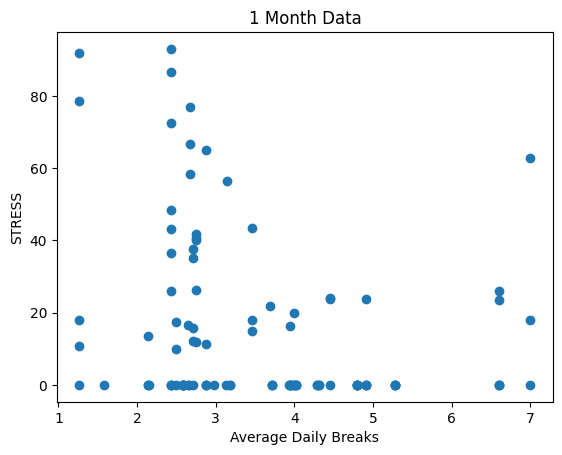

Mean STRESS of Breaks (1 Month) = 15.198380952380951


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and convert local_time column to datetime
dffridaypm = pd.read_csv('FridayPM.csv', encoding='latin1')
dffridaypm['local_time'] = pd.to_datetime(dffridaypm['local_time'])

# Filter data for the last 1 months
end_date = dffridaypm['local_time'].max()
start_date = end_date - pd.DateOffset(months=1)
dffridaypm = dffridaypm[(dffridaypm['local_time'] >= start_date) & (dffridaypm['local_time'] <= end_date)]

# Drop rows with missing values
dffridaypm = dffridaypm.dropna()

# Calculate scores for productivity
prod_cols = [f'STRESS']
dffridaypm['STRESS'] = dffridaypm[prod_cols].mean(axis=1)

# Calculate E-Work_life_scale based on weighted scores
dffridaypm['STRESS'] = ((dffridaypm['STRESS'] * 1))

# Merge with the average breaks data
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

# df_avgbreaks = pd.read_csv('average_breaks.csv')
eworkMerged = pd.merge(dffridaypm, df_avgbreaks, on='rsp_id', how="right")

# Scatter plot of E-Work_life_scale vs. Daily Breaks
plt.scatter(eworkMerged['DAILY_BREAKS'], eworkMerged['STRESS'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("STRESS")
plt.title("1 Month Data")
plt.show()

# Print the mean E-Work_life_scale of breaks
print("Mean STRESS of Breaks (1 Month) = " + str(eworkMerged['STRESS'].mean()))
